# Project 4, APS1070 Fall 2022
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Ziruo Song
*   Your **student number**: 1005637198



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

#### Step 1: Print the dataframe.

In [2]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


#### Step 2: Prepare dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split ==> train/test/validation set
X= df.drop(columns='Goal').values
y= df.Goal.values
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,test_size=0.15,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size= 0.15/(0.15+0.7),random_state=1)
print('training:',X_train.shape[0]/df.shape[0]*100,'|validation:',X_val.shape[0]/df.shape[0]*100,
      '|test:',X_test.shape[0]/df.shape[0]*100)

# Standardize the data
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #learn the parameters of scaling on the train data 
X_val_scaled = scaler.transform(X_val)          #use the scaling paramaters learned to scale validation/test data.
X_test_scaled = scaler.transform(X_test)

# Insert the 1st column with value 1
X_train_scaled = np.insert(X_train_scaled,0,1,axis=1)
X_val_scaled = np.insert(X_val_scaled,0,1,axis=1)
X_test_scaled = np.insert(X_test_scaled,0,1,axis=1)

training: 69.99272727272728 |validation: 15.003636363636364 |test: 15.003636363636364


#### Step 3: Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?

* epoch: The entire dataset is passed forward and backward only once for a epoch. -Each time the model learns the whole dataset.

* iteration: The times that a batch of data pass through the whole algorithm. Each time we update the weights.

For example, if we have 2000 training samples, and we divide the whole set into batches of 500 (batchsize), then there will be 4 iterations to complete 1 epoch.

(Reference: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

#### Step 1: Implement the direct solution of the linear regression problem on the training set.

In [4]:
from scipy import linalg 

W = np.dot(linalg.inv(np.dot(X_train_scaled.T, X_train_scaled)), np.dot(X_train_scaled.T, y_train))

#### Step 2: Report the root-mean-square error (RMSE) for both the training and validation sets.

In [5]:
from sklearn.metrics import mean_squared_error

y_pred_train = np.dot(X_train_scaled, W) # prediction on the training set
y_pred_val = np.dot(X_val_scaled, W) # prediction on the validation set
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

RMSE_train = rmse(y_pred_train, y_train)
RMSE_val = rmse(y_pred_val, y_val)
print('RMSE training: ', RMSE_train)
print('RMSE validation: ', RMSE_val)

RMSE training:  0.00018275680582194054
RMSE validation:  0.00017786975557982808


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

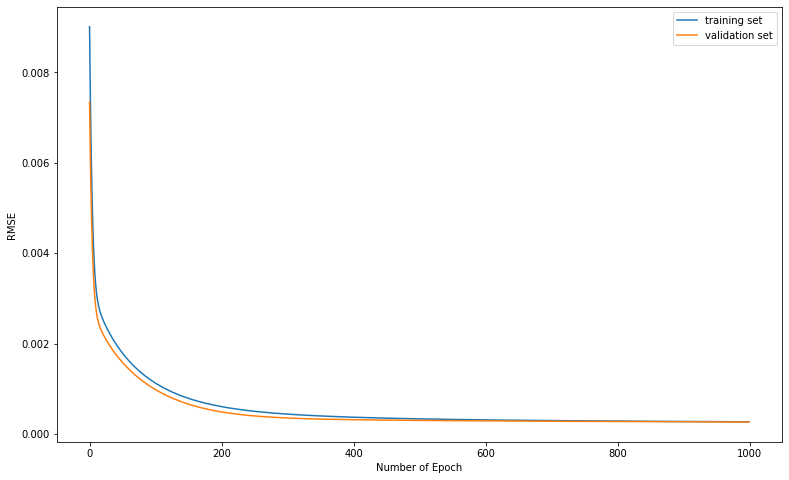

--- Total Training Time: 5.150401592254639 (s) ---


In [6]:
import time
import matplotlib.pyplot as plt

w = 0.001 * (np.random.random(X_train_scaled.shape[1]))   #initial weight
lr = 0.01                                                 # learning rate 
CT = 1.001 * RMSE_val                                     #convergence threshold
rmse_train_lst = []
rmse_val_lst = []
start_time = time.time()                                  # Records current time

for epoch in range (0, 1000): 
    y_pred_train = np.dot(X_train_scaled,w.T)
    rmse_train_lst.append(rmse(y_pred_train,y_train))   
    
    # compute the gradients
    gradient = 1/len(y_pred_train) * np.dot(X_train_scaled.T, y_pred_train - y_train) 
    
    # weight update once a loop
    w = w - lr * gradient 

    y_pred_val = np.dot(X_val_scaled,w.T)
    rmse_val_lst.append(rmse(y_pred_val,y_val))
      
    if rmse(y_pred_val,y_val) <= CT:
        break 

# Plot the training RMSE and the validation RMSE vs. epoch on the same figure
plt.figure(figsize=(13,8))
plt.plot(rmse_train_lst, label = 'training set')
plt.plot(rmse_val_lst, label = 'validation set')
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()
           
# Training time
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

#### Comment on overfitting/underfitting by observing the training and validation RMSE.
At the beginning with low number of Epoch, the RMSE of training set is a little bit higher than that of validation set, which seems to be slightly underfit, but both of them are quite small, and the difference is decreasing as the number of epoch rises, so the model fits well generally.



## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [7]:
import time
def minibatch(X_train, X_val, y_train, y_val, batch_size, lr, CT): 
    rmse_train_lst=[]
    rmse_val_lst=[]
    elapsed_time_lst = []

    w = 0.001 * (np.random.random(X_train_scaled.shape[1]))
    batch = len(X_train)//batch_size
    start_time = time.time()
    for epoch in range (0, 15000):     
        for n in range (0, batch):
            i = len(X_train) if ((n+1)*batch_size > X_train.shape[0]) else (n+1)*batch_size
            y_pred_train = np.dot(X_train[n*batch_size:i],w.T)
            gradient = 1/len(y_pred_train)*np.dot(X_train[n*batch_size:i].T,y_pred_train-y_train[n*batch_size:i])
            w = w - lr * gradient

        y_pred_train_2 = np.dot(X_train, w.T)
        rmse_train_lst.append(rmse(y_pred_train_2, y_train))
        
        y_pred_val_2 = np.dot(X_val,w.T)
        rmse_val_lst.append(rmse(y_pred_val_2,y_val))

        # using reduce() + lambda to check for strictly increasing RMSE for train/validation
        if (len(rmse_train_lst)>=10 and all(i < j for i, j in zip(rmse_train_lst, rmse_train_lst[1:]))):
            break;
        elif (len(rmse_val_lst)>=10 and all(i < j for i, j in zip(rmse_val_lst, rmse_val_lst[1:]))):
            break;

        # update elapsed time
        elapsed_time_lst.append(time.time()-start_time)

        #compare with convergence threshold, if not convergent, shuffule the Training sets for next epoch
        if rmse(y_pred_val_2,y_val) <= CT:
            break;
        else:   
            shuffle = np.random.permutation(X_train.shape[0])
            X_train, y_train = X_train[shuffle], y_train[shuffle]  


    # convert each result from list to array 
    elapsed_time = np.array(elapsed_time_lst)
    rmse_train = np.array(rmse_train_lst)
    rmse_val = np.array(rmse_val_lst)

    return w, rmse_train,rmse_val,elapsed_time

#### Sweep different values for the mini-batch size (at least 5 values that converge)

In [8]:
# Try 10 batch size, with at least 5 convergent ones.
for size in list(2**n for n in range(1,11)):
    rmse_val_lst = minibatch(X_train_scaled, X_val_scaled, y_train, y_val, size, 0.01, RMSE_val*1.001)[-2]
    if rmse_val_lst[-1] <= (RMSE_val*1.001): 
        print('Batch size:', size, '==> converge' )
    else:
        print('Batch size:', size, '==> diverge')

Batch size: 2 ==> diverge
Batch size: 4 ==> diverge
Batch size: 8 ==> diverge
Batch size: 16 ==> diverge
Batch size: 32 ==> diverge
Batch size: 64 ==> converge
Batch size: 128 ==> converge
Batch size: 256 ==> converge
Batch size: 512 ==> converge
Batch size: 1024 ==> converge


#### Plot training and validation RMSE vs. epoch for all the converging batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. 

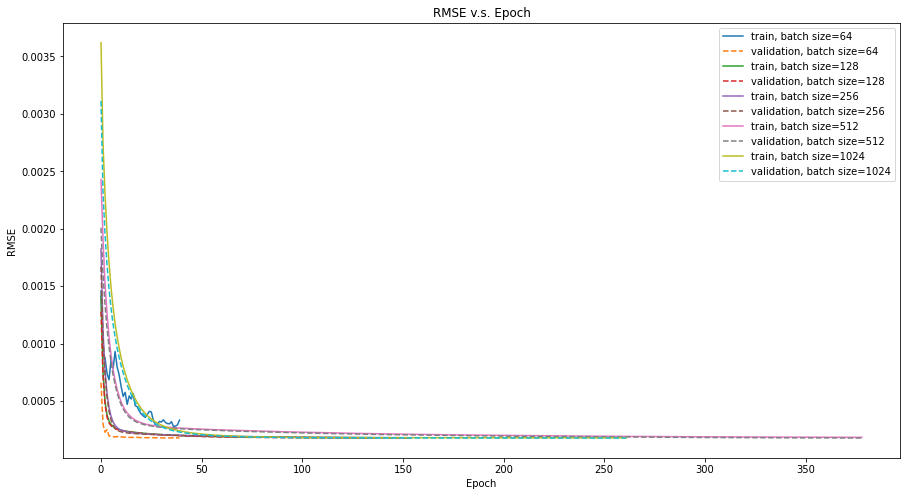

In [9]:
import matplotlib.pyplot as plt
conv_batch = [64,128,256,512,1024]
fig = plt.figure(figsize=(15,8))
for i in conv_batch:
    result =  minibatch(X_train_scaled, X_val_scaled, y_train, y_val, i, 0.01, RMSE_val *1.001)
    RMSE_result_train = result[1]
    RMSE_result_val = result[2]
    plt.plot(RMSE_result_train, label = 'train, batch size={}'.format(i))
    plt.plot(RMSE_result_val, label = 'validation, batch size={}'.format(i), linestyle ='--')
    plt.title('RMSE v.s. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()

#### Plot training and validation RMSE vs. time for all the converging batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE.

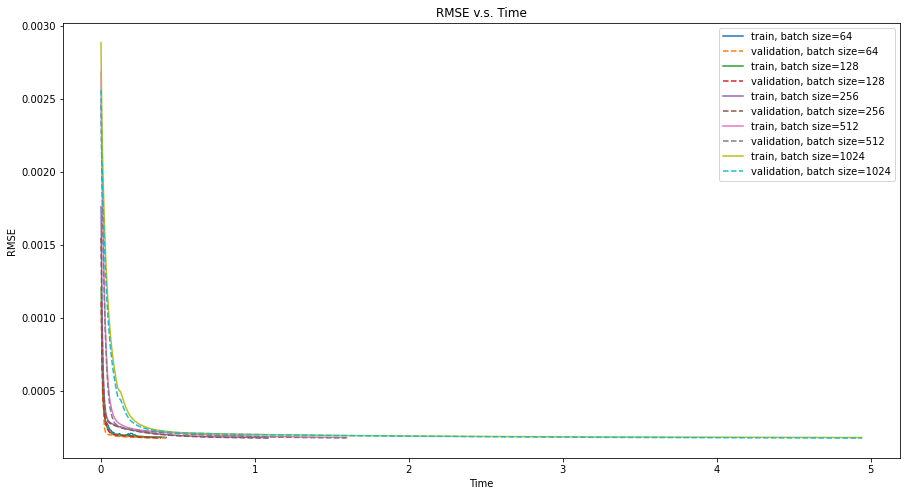

In [10]:
fig = plt.figure(figsize=(15,8))
for i in conv_batch:
    result =  minibatch(X_train_scaled, X_val_scaled, y_train, y_val, i, 0.01, RMSE_val *1.001)
    RMSE_result_train = result[1]
    RMSE_result_val = result[2]
    time_result = result[-1]
    plt.plot(time_result,RMSE_result_train, label = 'train, batch size={}'.format(i))
    plt.plot(time_result,RMSE_result_val, label = 'validation, batch size={}'.format(i), linestyle ='--')
    plt.title('RMSE v.s. Time')
    plt.xlabel('Time')
    plt.ylabel('RMSE')
    plt.legend()

#### Plot Total training time (y-axis) vs. Batch size (x-axis).

Text(0, 0.5, 'Total Traning time')

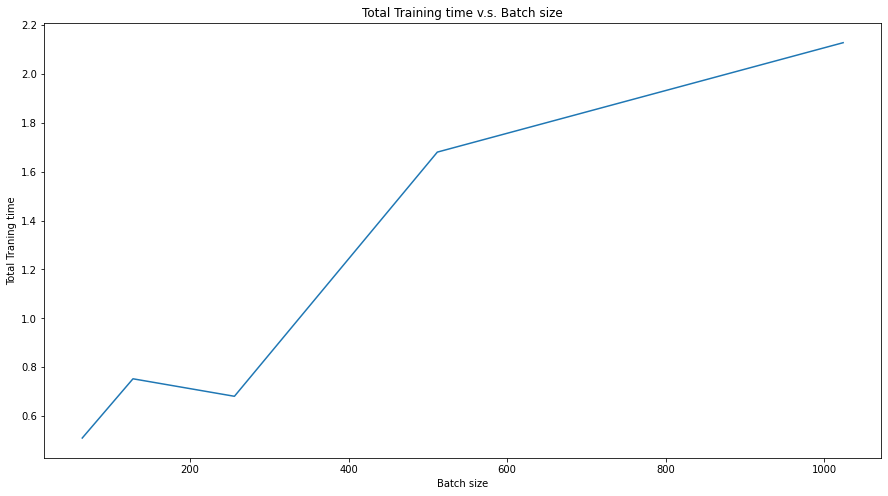

In [11]:
fig = plt.figure(figsize=(15,8))
time_result = []
for i in conv_batch:
    time_result.append(minibatch(X_train_scaled, X_val_scaled, y_train, y_val, i, 0.01, RMSE_val *1.001)[-1][-1])
plt.plot(conv_batch,time_result)
plt.title('Total Training time v.s. Batch size')
plt.xlabel('Batch size')
plt.ylabel('Total Traning time')

#### Describe your findings, including the main takeaways from each of your plots.
* Generally, the RMSE for both training and validation set would decrease as number of epoch or the time increases. Given a same number of epoch or elapsed training time, the RMSE of the validation set with a smaller batch size would be less if compared with a lager batch size. Note here, the RMSE with batch size=64 would fluctuate more with different number of epoch.

* Given a time point, the RMSE with smaller value of batch size would be less, and a smaller batch size would converge quicker overall, even though there are some fluctuations given the batch size we've tried.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

Step 1: find a learning rate that results in convergence for 3 batchsize.
Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. 

In [12]:
# 3 bacth size that lead to divergence above
div_batch = [2,8,16]

# Possible learning rate may lead to convergent 
lr_lst =[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lr_of_conver = []
RMSE_train_of_conver=[]
RMSE_val_of_conver=[]

# If the learing rate leads to convergence, stop iteration for the next possible value
for s in div_batch:
    n = 0
    l = lr_lst[n]
    result = minibatch(X_train_scaled, X_val_scaled, y_train, y_val, s, l, RMSE_val*1.001)
    while result[2][-1] <= (RMSE_val*1.001):   #if converge with a given learning rate
        lr_of_conver.append(l)
        RMSE_train_of_conver.append(result[1][-1])
        RMSE_val_of_conver.append(result[2][-1])
        break
    else:
        n+=1

# Report findings in a table
report_df = pd.DataFrame([lr_of_conver,RMSE_train_of_conver,RMSE_val_of_conver], index = div_batch, 
                         columns = ['learning_rate','training_RMSE','validation_RMSE'])
report_df = report_df.rename_axis('Batch_Size', axis = 1)
report_df

Batch_Size,learning_rate,training_RMSE,validation_RMSE
2,0.000100,0.000100,0.000100
8,0.000181,0.000182,0.000182
16,0.000178,0.000178,0.000178


Step 2: Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.

In [13]:
# The best batch_size based on Part 4's fastest convergence time is 128.
best_size = 64

# check if these 10 learning rate here lead to convergence
lr_here = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
for lr in lr_here:
    rmse_val_lst = minibatch(X_train_scaled, X_val_scaled, y_train, y_val, best_size, lr, RMSE_val*1.001)[-2]
    if rmse_val_lst[-1] <= RMSE_val*1.001: 
        print('learning rate:', lr, '==> converge' )
    else:
        print('learning rate:', lr, '==> diverge')

learning rate: 0.001 ==> converge
learning rate: 0.002 ==> converge
learning rate: 0.003 ==> converge
learning rate: 0.004 ==> converge
learning rate: 0.005 ==> converge
learning rate: 0.006 ==> converge
learning rate: 0.007 ==> converge
learning rate: 0.008 ==> converge
learning rate: 0.009 ==> converge
learning rate: 0.01 ==> converge


Plot 1: Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure. 

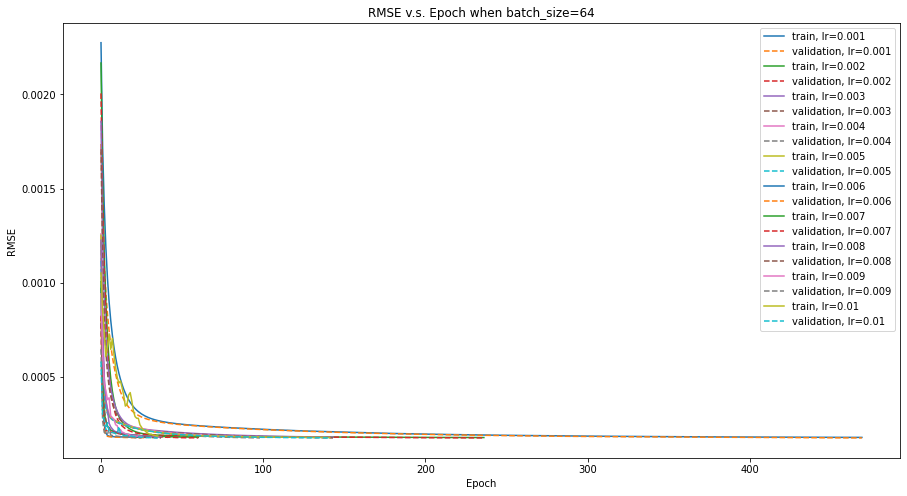

In [14]:
fig = plt.figure(figsize=(15,8))
for lr in lr_here:
    result =  minibatch(X_train_scaled, X_val_scaled, y_train, y_val,best_size , lr, RMSE_val *1.001)
    RMSE_result_train = result[1]
    RMSE_result_val = result[2]
    plt.plot(RMSE_result_train, label = 'train, lr={}'.format(lr))
    plt.plot(RMSE_result_val, label = 'validation, lr={}'.format(lr), linestyle ='--')
    plt.title('RMSE v.s. Epoch when batch_size={}'.format(best_size))
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()

Plot 2: Plot the training and validation RMSE vs. time (x-axis) for all the learning rates that you tried in a figure.

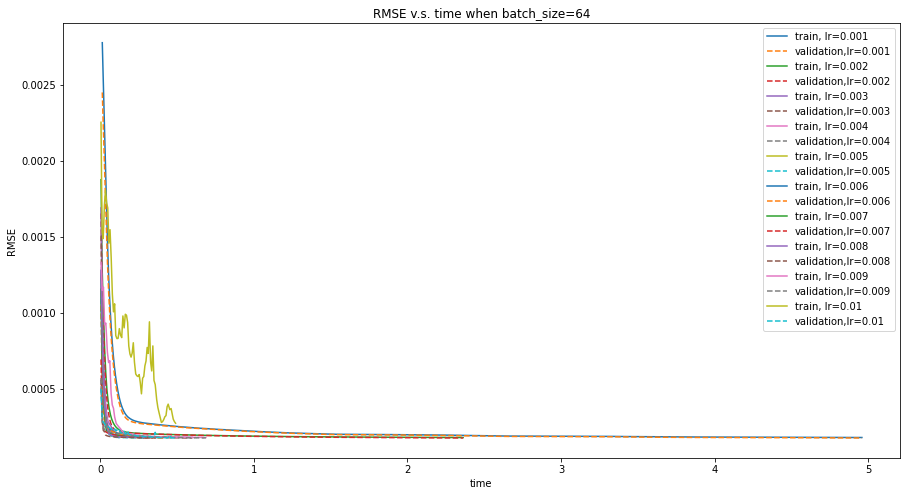

In [15]:
fig = plt.figure(figsize=(15,8))
for lr in lr_here:
    result =  minibatch(X_train_scaled, X_val_scaled, y_train, y_val, best_size, lr, RMSE_val *1.001)
    RMSE_result_train = result[1]
    RMSE_result_val = result[2]
    time_result = result[-1]
    plt.plot(time_result, RMSE_result_train, label = 'train, lr={}'.format(lr))
    plt.plot(time_result, RMSE_result_val, label = 'validation,lr={}'.format(lr), linestyle ='--')
plt.title('RMSE v.s. time when batch_size={}'.format(best_size))  
plt.xlabel('time')
plt.ylabel('RMSE')
plt.legend()

#### Describe your findings, including the main takeaways from each of your plots.
* Learning rate determines how fast or slow we will move towards the optimal weights. The SGD converges the RMSE in all 10 cases(with different learning rate) but at different speeds. The RMSE decreases with the number of epochs, but the marginal difference with more number of epochs decreases drastically for all 10 learning rates. 
* By the time plot, When we pick the batch size=64, and the learning rate= 0.01,the time used to converge is the least.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

#### As the fastest convergence time is 64 based on the time plot from Part 4, 64 is chosen to be the best batch size. As the time used to convergent when batche_size = 64 with learning rate=0.01 is least, choose lr=0.01.

In [16]:
best_size =64 
best_lr = 0.01 
best_result = minibatch(X_train_scaled, X_val_scaled, y_train, y_val,best_size , 
                        best_lr, RMSE_val *1.001)
best_time = best_result[-1][-1]
best_rmse_val = best_result[2][-1]
print('Elapsed time to converge: {}\nRMSE for validation {}'.format(
    round(best_time,3),best_rmse_val))

Elapsed time to converge: 0.497
RMSE for validation 0.00017756583763938445


## Part 7 - Getting started with GitHub  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ZC8Petsq to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/f22-project4-git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/f22-project4-git-*********
```
If this is the first time you are using Git Bash, it will ask you to sign in on GitHub via your browser. 

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\f22-project4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add F22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

In [17]:
brew install git

SyntaxError: ignored

**Private Repository Link : <font color='red'>** **--FILL HERE---**</font>